In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("train_cleaned.csv") #import file accordingly
train.head()

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,0,-0.272422,-0.421012,1.344057,-0.012199,0.076245,1.08786,0.236326,3,0,1,0,0,0,0,10,2,1
1,1,0.857936,0.146322,0.503673,-0.976688,-0.566950,-0.40927,-0.304531,4,1,2,0,1,0,0,0,3,0
2,2,0.952132,-0.173937,1.824277,-0.701673,0.076245,-0.40927,-0.304531,6,1,2,0,0,0,0,5,3,0
3,3,0.857936,-0.378592,0.983892,-0.039313,-0.566950,-0.40927,-0.304531,4,0,2,0,1,0,0,5,3,0
4,4,1.328918,1.565628,-1.177096,-0.097415,-0.245352,-0.40927,-0.304531,0,1,1,0,0,0,0,8,3,0


In [5]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,3.390800e+04,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-6.763887e-17,1.011473e-16,-1.368592e-16,-1.627616e-17,4.802661e-16,3.634157e-16,7.197361e-16,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.156352e+00,-3.040398e+00,-1.777371e+00,-9.999282e-01,-5.669499e-01,-4.092695e-01,-3.045314e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.434043e-01,-4.193929e-01,-9.369864e-01,-6.009632e-01,-5.669499e-01,-4.092695e-01,-3.045314e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-1.782255e-01,-2.956934e-01,2.345299e-02,-3.027078e-01,-2.453524e-01,-4.092695e-01,-3.045314e-01,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,6.695428e-01,2.003184e-02,6.237276e-01,2.357013e-01,7.624522e-02,-4.092695e-01,-3.045314e-01,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.096777e+00,3.262716e+01,1.824277e+00,1.804968e+01,1.937210e+01,8.181644e+00,2.944263e+01,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


## Clustering customers who churned (label = 1)

In [6]:
churned = train[train['labels']==1]
churned.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.272422,-0.421012,1.344057,-0.012199,0.076245,1.087860,0.236326,3,0,1,0,0,0,0,10,2,1
5,1.423115,-0.443679,1.344057,0.154359,-0.566950,0.716090,4.022328,4,1,1,0,0,0,0,10,1,1
14,-0.084029,-0.342971,-1.177096,1.858676,-0.245352,-0.409270,-0.304531,9,0,1,0,0,0,0,1,3,1
18,-1.402780,1.050106,1.464112,1.568167,0.076245,1.570157,0.777183,8,2,1,0,0,0,0,8,1,1
46,-0.743404,0.221448,1.103947,0.828339,1.041038,-0.409270,-0.304531,3,1,0,0,0,0,0,1,3,1


In [7]:
#drop label column
churned = churned.drop(columns='labels')
churned.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,-0.272422,-0.421012,1.344057,-0.012199,0.076245,1.087860,0.236326,3,0,1,0,0,0,0,10,2
5,1.423115,-0.443679,1.344057,0.154359,-0.566950,0.716090,4.022328,4,1,1,0,0,0,0,10,1
14,-0.084029,-0.342971,-1.177096,1.858676,-0.245352,-0.409270,-0.304531,9,0,1,0,0,0,0,1,3
18,-1.402780,1.050106,1.464112,1.568167,0.076245,1.570157,0.777183,8,2,1,0,0,0,0,8,1
46,-0.743404,0.221448,1.103947,0.828339,1.041038,-0.409270,-0.304531,3,1,0,0,0,0,0,1,3


In [8]:
from sklearn.cluster import KMeans

In [9]:
features = churned[churned.columns]

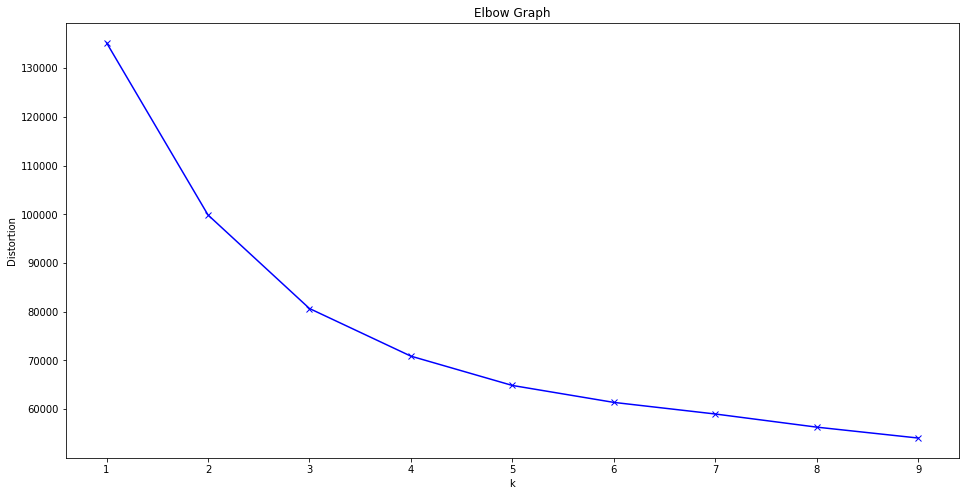

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Graph')
plt.show()

In [11]:
kmeanModel = KMeans(n_clusters=5) #change n_clusters accordingly to elbow point
kmeanModel.fit(features)

KMeans(n_clusters=5)

In [12]:
 kmeanModel.cluster_centers_

array([[-2.07317286e-01, -3.28844238e-02, -9.19671949e-02,
         1.55194004e+00, -1.46830559e-01,  1.31237363e-01,
         1.95239735e-01,  7.18555417e-01,  1.21046077e+00,
         1.01245330e+00,  1.86799502e-02,  5.70361146e-01,
         1.56911582e-01,  5.30510585e-01,  7.20921544e+00,
         2.50311333e+00],
       [ 5.78516926e-01,  2.80916748e-01, -1.26322382e-01,
         9.33031097e-01, -2.47796639e-01,  3.97253356e-01,
         4.07803087e-01,  4.29750271e+00,  1.09880565e+00,
         1.64060803e+00,  4.34310532e-03,  3.14875136e-01,
         8.25190011e-02,  2.99674267e-01,  7.87839305e+00,
         2.24864278e+00],
       [-3.33052148e-01,  9.57430655e-02, -1.66399847e-02,
         9.89513096e-01, -1.94352742e-01,  2.88681289e-01,
         3.13014775e-01,  8.55597015e+00,  1.40858209e+00,
         1.37686567e+00,  7.46268657e-03,  2.57462687e-01,
         4.66417910e-02,  5.78358209e-02,  1.48134328e+00,
         2.39552239e+00],
       [-4.47408232e-01,  3.54461885e

In [13]:
#store cluster label in new column
churned['cluster'] = kmeanModel.labels_ +1
churned.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,cluster
0,-0.272422,-0.421012,1.344057,-0.012199,0.076245,1.087860,0.236326,3,0,1,0,0,0,0,10,2,2
5,1.423115,-0.443679,1.344057,0.154359,-0.566950,0.716090,4.022328,4,1,1,0,0,0,0,10,1,2
14,-0.084029,-0.342971,-1.177096,1.858676,-0.245352,-0.409270,-0.304531,9,0,1,0,0,0,0,1,3,3
18,-1.402780,1.050106,1.464112,1.568167,0.076245,1.570157,0.777183,8,2,1,0,0,0,0,8,1,4
46,-0.743404,0.221448,1.103947,0.828339,1.041038,-0.409270,-0.304531,3,1,0,0,0,0,0,1,3,5


In [14]:
#see how many customers are in each cluster
churned['cluster'].value_counts(sort = False)

2    921
4    808
1    803
3    536
5    899
Name: cluster, dtype: int64

In [17]:
#calculating z score
#cluster mean
clus_mean = churned.groupby(['cluster'])[churned.columns].mean()
clus_mean

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,cluster
cluster,,,,,,,,,,,,,,,,,
1,-0.207317,-0.032884,-0.091967,1.551940,-0.146831,0.131237,0.195240,0.718555,1.210461,1.012453,0.018680,0.570361,0.156912,0.530511,7.209215,2.503113,1
2,0.578517,0.280917,-0.126322,0.933031,-0.247797,0.397253,0.407803,4.297503,1.098806,1.640608,0.004343,0.314875,0.082519,0.299674,7.878393,2.248643,2
3,-0.333052,0.095743,-0.016640,0.989513,-0.194353,0.288681,0.313015,8.555970,1.408582,1.376866,0.007463,0.257463,0.046642,0.057836,1.481343,2.395522,3
4,-0.447408,0.035446,-0.113243,1.145453,-0.225452,0.282329,0.371540,8.342822,1.420792,1.310644,0.009901,0.413366,0.110149,0.326733,7.433168,2.325495,4
5,0.428446,0.241947,-0.080977,0.802371,-0.206002,0.337848,0.333789,3.022247,1.183537,1.443826,0.007786,0.276974,0.062291,0.095662,1.332592,2.301446,5


In [21]:
#population mean
pop_means = pd.Series(churned[churned.columns].mean())
pop_means

feature_0     0.053312
feature_1     0.133549
feature_2    -0.091608
feature_3     1.079598
feature_4    -0.206115
feature_5     0.291866
feature_6     0.327810
feature_7     4.683388
feature_8     1.248046
feature_9     1.366020
feature_10    0.009579
feature_11    0.370305
feature_12    0.093774
feature_13    0.273002
feature_14    5.304512
feature_15    2.347618
cluster       3.019914
dtype: float64

In [22]:
#Calculating population std deviation
pop_std= pd.Series(churned[churned.columns].std())
pop_std

feature_0     1.264199
feature_1     1.090929
feature_2     1.016854
feature_3     1.524094
feature_4     0.611796
feature_5     1.198549
feature_6     1.352362
feature_7     3.163646
feature_8     0.649280
feature_9     0.743189
feature_10    0.097415
feature_11    0.482947
feature_12    0.291550
feature_13    0.632244
feature_14    3.399080
feature_15    1.023382
cluster       1.467021
dtype: float64

In [23]:
clus_mean.T.info() #transpose is .T

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, feature_0 to cluster
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       17 non-null     float64
 1   2       17 non-null     float64
 2   3       17 non-null     float64
 3   4       17 non-null     float64
 4   5       17 non-null     float64
dtypes: float64(5)
memory usage: 1.4+ KB


In [24]:
#Saving a copy of the transposed DF
clus_meant = clus_mean.T

In [25]:
# Change columns name to be the same as the number of clusters you have from the elbow graph
clus_meant.columns = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5'] 

In [26]:
clus_meant

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
feature_0,-0.207317,0.578517,-0.333052,-0.447408,0.428446
feature_1,-0.032884,0.280917,0.095743,0.035446,0.241947
feature_2,-0.091967,-0.126322,-0.016640,-0.113243,-0.080977
feature_3,1.551940,0.933031,0.989513,1.145453,0.802371
feature_4,-0.146831,-0.247797,-0.194353,-0.225452,-0.206002
feature_5,0.131237,0.397253,0.288681,0.282329,0.337848
feature_6,0.195240,0.407803,0.313015,0.371540,0.333789
feature_7,0.718555,4.297503,8.555970,8.342822,3.022247
feature_8,1.210461,1.098806,1.408582,1.420792,1.183537
feature_9,1.012453,1.640608,1.376866,1.310644,1.443826


In [27]:
#join works easily when joining on index
temp1 = clus_meant.join(pd.DataFrame(pop_means))

In [29]:
# Change columns name to be the same as the number of clusters you have from the elbow graph + pop_mean
temp1.columns = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','pop_mean']  
temp1.index

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'cluster'],
      dtype='object')

In [30]:
temp1

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,pop_mean
feature_0,-0.207317,0.578517,-0.333052,-0.447408,0.428446,0.053312
feature_1,-0.032884,0.280917,0.095743,0.035446,0.241947,0.133549
feature_2,-0.091967,-0.126322,-0.016640,-0.113243,-0.080977,-0.091608
feature_3,1.551940,0.933031,0.989513,1.145453,0.802371,1.079598
feature_4,-0.146831,-0.247797,-0.194353,-0.225452,-0.206002,-0.206115
feature_5,0.131237,0.397253,0.288681,0.282329,0.337848,0.291866
feature_6,0.195240,0.407803,0.313015,0.371540,0.333789,0.327810
feature_7,0.718555,4.297503,8.555970,8.342822,3.022247,4.683388
feature_8,1.210461,1.098806,1.408582,1.420792,1.183537,1.248046
feature_9,1.012453,1.640608,1.376866,1.310644,1.443826,1.366020


In [31]:
temp2 = temp1.join(pd.DataFrame(pop_std))

# Change columns name to be the same as the number of clusters you have from the elbow graph + pop_mean and pop_std
temp2.columns = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','pop_mean','pop_std']  
temp2

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,pop_mean,pop_std
feature_0,-0.207317,0.578517,-0.333052,-0.447408,0.428446,0.053312,1.264199
feature_1,-0.032884,0.280917,0.095743,0.035446,0.241947,0.133549,1.090929
feature_2,-0.091967,-0.126322,-0.016640,-0.113243,-0.080977,-0.091608,1.016854
feature_3,1.551940,0.933031,0.989513,1.145453,0.802371,1.079598,1.524094
feature_4,-0.146831,-0.247797,-0.194353,-0.225452,-0.206002,-0.206115,0.611796
feature_5,0.131237,0.397253,0.288681,0.282329,0.337848,0.291866,1.198549
feature_6,0.195240,0.407803,0.313015,0.371540,0.333789,0.327810,1.352362
feature_7,0.718555,4.297503,8.555970,8.342822,3.022247,4.683388,3.163646
feature_8,1.210461,1.098806,1.408582,1.420792,1.183537,1.248046,0.649280
feature_9,1.012453,1.640608,1.376866,1.310644,1.443826,1.366020,0.743189


In [34]:
#remove last row as it is not needed to calculate z-score
temp2 = temp2[:-1]

In [39]:
no_of_clusters = churned['cluster'].nunique()
no_of_rows = temp2.shape[0]

In [40]:
z_score = pd.DataFrame(np.random.randn(no_of_rows, no_of_clusters))

In [42]:
z_score
z_score.columns = clus_meant.columns
z_score.index = temp2.index

In [43]:
#applying formula for z_score for profiling 
v = 0
for v in range(no_of_rows):
    clus = 0
    for clus in range(no_of_clusters):
        z_score.iloc[v,clus] = (temp2.iloc[v,clus] - temp2.iloc[v,no_of_clusters])/ (temp2.iloc[v,no_of_clusters+1])
        clus = clus + 1 
    v = v + 1 

In [44]:
z_score

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
feature_0,-0.206162,0.415445,-0.305620,-0.396077,0.296736
feature_1,-0.152561,0.135085,-0.034654,-0.089925,0.099363
feature_2,-0.000353,-0.034139,0.073726,-0.021276,0.010455
feature_3,0.309916,-0.096167,-0.059107,0.043209,-0.181897
feature_4,0.096903,-0.068129,0.019226,-0.031606,0.000185
feature_5,-0.134020,0.087929,-0.002657,-0.007958,0.038364
feature_6,-0.098028,0.059151,-0.010940,0.032337,0.004421
feature_7,-1.253248,-0.121975,1.224088,1.156714,-0.525072
feature_8,-0.057888,-0.229856,0.247252,0.266058,-0.099355
feature_9,-0.475742,0.369473,0.014594,-0.074511,0.104693


In [45]:
z_score.round(2)

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
feature_0,-0.21,0.42,-0.31,-0.40,0.30
feature_1,-0.15,0.14,-0.03,-0.09,0.10
feature_2,-0.00,-0.03,0.07,-0.02,0.01
feature_3,0.31,-0.10,-0.06,0.04,-0.18
feature_4,0.10,-0.07,0.02,-0.03,0.00
feature_5,-0.13,0.09,-0.00,-0.01,0.04
feature_6,-0.10,0.06,-0.01,0.03,0.00
feature_7,-1.25,-0.12,1.22,1.16,-0.53
feature_8,-0.06,-0.23,0.25,0.27,-0.10
feature_9,-0.48,0.37,0.01,-0.07,0.10


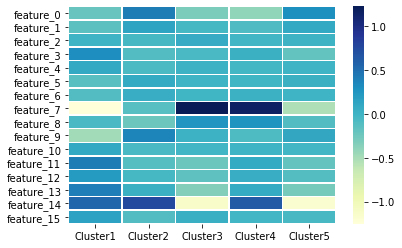

In [46]:
sns.heatmap(z_score,  linewidths=.5, cmap="YlGnBu")